<a href="https://colab.research.google.com/github/berthasaragi/Data_Mining/blob/main/Data_Preparation_2209116047_Bertha_Joy_Rodo_Saragi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nama : Bertha Joy Rodo Saragi**
#**NIM : 2209116047**
#**Kelas : A2**

#**Analisis Performa Atlet Renang dalam Olimpiade melalui histori hasil perlombaan**

#**Import Library**

In [1020]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.patches import Patch
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#**Business Understanding**

#Business Objective

Tujuan bisnis dari analisis dataset ini adalah untuk memberikan wawasan yang mendalam kepada sponsor, federasi olahraga, dan penggemar tentang prestasi atlet dan tim nasional dalam Olimpiade renang.

#Asess Situation

Situasi bisnis yang mendasari analisis dataset ini adalah Tingginya minat dan popularitas olahraga renang dalam Olimpiade serta Kebutuhan federasi olahraga untuk meningkatkan kualitas dan konsistensi kinerja atlet renang.

#Data mining goals

Tujuan dari analisis data ini adalah Menganalisis tren kinerja atlet-renang dari tahun ke tahun dalam Olimpiade untuk memahami apakah ada peningkatan atau penurunan dalam prestasi mereka dari waktu ke waktu.

#Project Plan

Rencana proyek untuk menganalisis performa atlet renang dalam Olimpiade melalui histori hasil perlombaan dimulai dengan tahap pengumpulan data dari berbagai sumber yang tersedia, termasuk data historis perlombaan renang dari tahun 1912 hingga 2020. Selanjutnya, data akan dianalisis untuk memahami karakteristiknya dan mengidentifikasi pola-pola yang menarik.

Setelah itu, data akan dieksplorasi lebih lanjut untuk mengidentifikasi korelasi dan hubungan antar variabel, seperti hubungan antara jenis kelamin atlet, jarak tempuh perlombaan, gaya renang, dan medley perorangan dengan hasil perlombaan. Analisis ini akan memberikan wawasan tentang faktor-faktor yang mempengaruhi kinerja atlet renang dalam kompetisi Olimpiade.

Selain itu, kualitas data akan dinilai secara menyeluruh dan masalah data seperti nilai yang hilang atau tidak valid akan diidentifikasi untuk kemudian diatasi dalam tahapan berikutnya. Langkah-langkah ini penting untuk memastikan keakuratan dan keandalan analisis data.

#Data Understanding

#Collect Initial Data

Dataset yang berjudul "Olympic Swimming History (1912 to 2020)" bersumber dari kaggle. Dataset ini berisi sejarah renang Olimpiade dari tahun 1912 hingga 2020.

berikut adalah link Dataset tersebut https://www.kaggle.com/datasets/datasciencedonut/olympic-swimming-1912-to-2020

In [1021]:
df = pd.read_csv("/content/Olympic_Swimming_Results_1912to2020.csv")

In [1022]:
df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4354,Stockholm,1912,4x100,Freestyle,1,Women,SWE,"Greta Carlsson, Vera Thulin, Sonja Johnsson, G...",NaN,5
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


#Describe Data

#Informasi Dasar

In [1023]:
df.shape

(4359, 10)

Dataset "Olympic Swimming History (1912 to 2020)" 4359 baris, dan 10 kolom.

#Informasi Lanjutan

In [1024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              4359 non-null   object
 1   Year                  4359 non-null   int64 
 2   Distance (in meters)  4359 non-null   object
 3   Stroke                4359 non-null   object
 4   Relay?                4359 non-null   int64 
 5   Gender                4359 non-null   object
 6   Team                  4359 non-null   object
 7   Athlete               4345 non-null   object
 8   Results               4331 non-null   object
 9   Rank                  4359 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 340.7+ KB


Berikut adalah penjelasan  untuk setiap kolom dalam data set "Olympic Swimming History (1912 to 2020)":

1. **Location**: Kota penyelenggara acara renang Olimpiade. Kolom Ini bertipe data `object`. Terdapat 4359 baris dalam kolom ini.

2. **Year**: Tahun Olimpiade di mana acara renang diadakan. Kolom Ini bertipe data `int64` (bilangan bulat). Terdapat 4359 baris dalam kolom ini.

3. **Distance**: Jarak perlombaan renang dalam meter, ditulis sebagai jumlah perenang dengan jarak yang ditempuh oleh satu perenang (misalnya, 4x200). Kolom Ini bertipe data `object`. Terdapat 4359 baris dalam kolom ini.

4. **Stroke**: Gaya renang yang dilombakan. Kolom Ini bertipe data `object`. Terdapat 4359 baris dalam kolom ini.

5. **Relay?**: Menunjukkan apakah perlombaan adalah perlombaan individu atau estafet. Nilai 0 menunjukkan perlombaan individu, sedangkan nilai 1 menunjukkan perlombaan estafet. Kolom Ini bertipe data `int64`. Terdapat 4359 baris dalam kolom ini.

6. **Gender**: Jenis kelamin atlet yang berpartisipasi dalam perlombaan. Kolom Ini bertipe data `object`. Terdapat 4359 baris dalam kolom ini.

7. **Team**: Kode tiga huruf untuk negara yang diwakili oleh atlet dalam perlombaan. Kolom Ini bertipe data `object`. Terdapat 4359 baris dalam kolom ini.

8. **Athlete**: Nama atlet yang berpartisipasi dalam perlombaan. Kolom Ini bertipe data `object`. Terdapat 4345 baris dalam kolom ini.

9. **Results**: Waktu atau hasil perlombaan. Kolom Ini bertipe data `object`. Terdapat 4331 baris dalam kolom ini.

10. **Rank**: Peringkat atlet dalam perlombaan. Kolom Ini bertipe data `int64`. Terdapat 4359 baris dalam kolom ini.

#Informasi Statistik Deskriptif

In [1025]:
df.describe()

,Year,Relay?,Rank
count,4359.000000,4359.000000,4359.000000
mean,1982.936453,0.169764,3.164946
std,26.928344,0.375468,1.189715
min,1912.000000,0.000000,0.000000
25%,1968.000000,0.000000,2.000000
50%,1988.000000,0.000000,4.000000
75%,2004.000000,0.000000,4.000000
max,2020.000000,1.000000,5.000000


Berikut adalah penjelasan untuk setiap kolom dari tabel statistik yang diberikan:

1. **Year**:
   - **count**: Jumlah data yang ada dalam kolom "Year". Terdapat 4359 data dalam kolom ini.
   - **mean**: Rata-rata tahun Olimpiade di mana acara renang diadakan. Rata-rata tahun adalah sekitar 1982.94.
   - **std**: Standar deviasi dari tahun Olimpiade. Standar deviasi adalah sekitar 26.93, menunjukkan sebaran data di sekitar rata-rata.
   - **min**: Tahun terkecil dalam kolom "Year", menunjukkan tahun Olimpiade paling awal di mana data tersedia, yaitu 1912.
   - **25%**: Kuartil pertama dari data tahun, menunjukkan tahun di mana 25% data pertama berada di bawahnya, yaitu sekitar tahun 1968.
   - **50%**: Median atau kuartil kedua dari data tahun, menunjukkan tahun di mana 50% data berada di bawahnya, yaitu sekitar tahun 1988.
   - **75%**: Kuartil ketiga dari data tahun, menunjukkan tahun di mana 75% data pertama berada di bawahnya, yaitu sekitar tahun 2004.
   - **max**: Tahun terbesar dalam kolom "Year", menunjukkan tahun Olimpiade paling terkini di mana data tersedia, yaitu 2020.

2. **Relay?**:
   - **count**: Jumlah data yang ada dalam kolom "Relay?". Terdapat 4359 data dalam kolom ini.
   - **mean**: Rata-rata nilai dalam kolom "Relay?". Rata-rata adalah sekitar 0.1697, menunjukkan bahwa sebagian besar perlombaan bukan merupakan perlombaan estafet.
   - **std**: Standar deviasi dari nilai dalam kolom "Relay?". Standar deviasi adalah sekitar 0.3755, menunjukkan sebaran data di sekitar rata-rata.
   - **min**: Nilai terkecil dalam kolom "Relay?", yaitu 0, menunjukkan perlombaan individu.
   - **25%**: Kuartil pertama dari data dalam kolom "Relay?", menunjukkan bahwa 25% data pertama berada di bawahnya, yaitu 0.
   - **50%**: Median atau kuartil kedua dari data dalam kolom "Relay?", menunjukkan bahwa 50% data berada di bawahnya, yaitu 0.
   - **75%**: Kuartil ketiga dari data dalam kolom "Relay?", menunjukkan bahwa 75% data pertama berada di bawahnya, yaitu 0.
   - **max**: Nilai terbesar dalam kolom "Relay?", yaitu 1, menunjukkan perlombaan estafet.

3. **Rank**:
   - **count**: Jumlah data yang ada dalam kolom "Rank". Terdapat 4359 data dalam kolom ini.
   - **mean**: Rata-rata peringkat atlet dalam perlombaan. Rata-rata peringkat adalah sekitar 3.1649.
   - **std**: Standar deviasi dari peringkat atlet dalam perlombaan. Standar deviasi adalah sekitar 1.1897, menunjukkan sebaran data di sekitar rata-rata.
   - **min**: Peringkat terkecil dalam kolom "Rank", yaitu 0, menunjukkan atlet yang tidak memulai/finish atau didiskualifikasi.
   - **25%**: Kuartil pertama dari data dalam kolom "Rank", menunjukkan bahwa 25% data pertama berada di bawahnya, yaitu 2.
   - **50%**: Median atau kuartil kedua dari data dalam kolom "Rank", menunjukkan bahwa 50% data berada di bawahnya, yaitu 4.
   - **75%**: Kuartil ketiga dari data dalam kolom "Rank", menunjukkan bahwa 75% data pertama berada di bawahnya, yaitu 4.
   - **max**: Peringkat terbesar dalam kolom "Rank", yaitu 5, menunjukkan tidak ada data yang tersedia.

#Exploratory Data Analysis

<ipython-input-1026-83f0f9310db3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




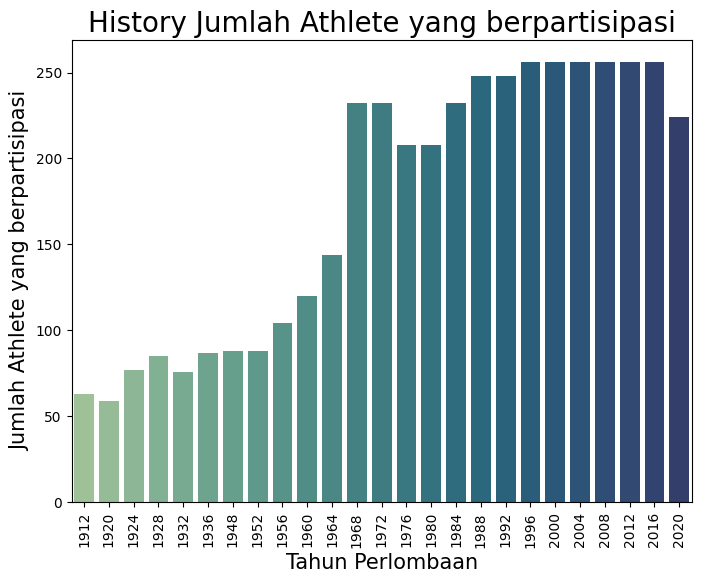

In [1026]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Year'].value_counts().index, y=df['Year'].value_counts().values, palette = 'crest')
plt.xlabel('Tahun Perlombaan', fontsize=15)
plt.ylabel('Jumlah Athlete yang berpartisipasi', fontsize=15)
plt.xticks(rotation=90)
plt.title("History Jumlah Athlete yang berpartisipasi", fontsize=20)
plt.show()

Dari Barchart di atas dapat kita lihat perbandingan jumlah athlete yang mengikuti pertandingan renang dari tahun ke tahun. dimana pada tahun 1968 ke 1972 meningkat drastis.

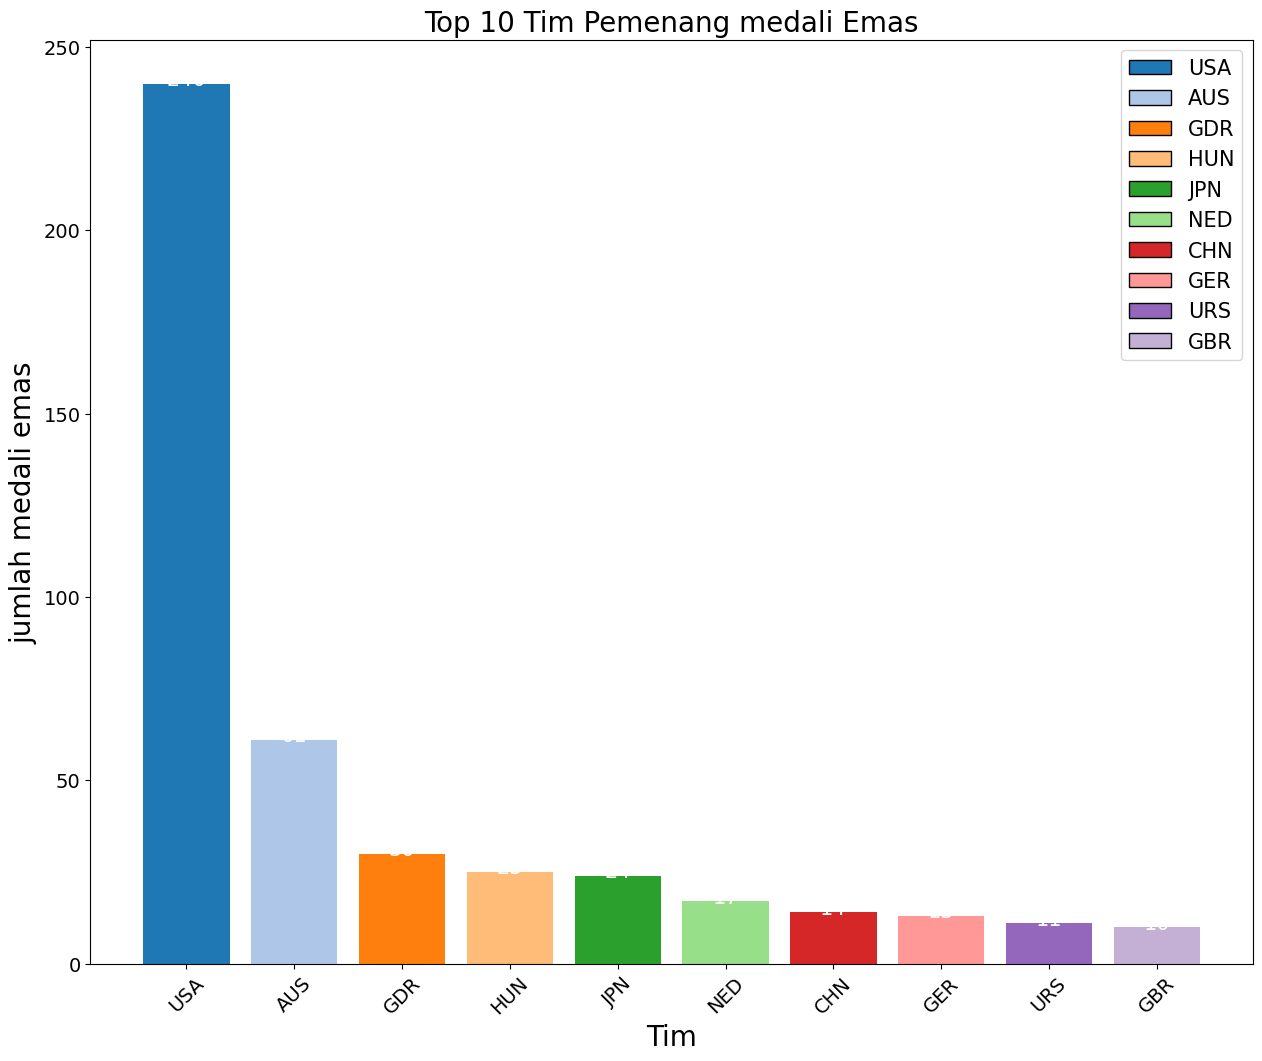

In [1027]:
gold_medals_pd = df[df['Rank'] == 1]
gold_medal_table = pd.pivot_table(gold_medals_pd, values='Rank', index='Team', aggfunc='count')
gold_medal_df = gold_medal_table.reset_index().rename(columns={'Rank': 'Gold Medal Count'})
gold_medal_df = gold_medal_df.sort_values('Gold Medal Count', ascending=False)[:10].reset_index(drop=True)

# Create Bar Graph
plt.rcParams['figure.figsize'] = [15, 12]

color_dict = {val: plt.cm.tab20(i) for i, val in enumerate(gold_medal_df['Team'])}

fig, ax = plt.subplots()
ax.bar(gold_medal_df['Team'], gold_medal_df['Gold Medal Count'], color=gold_medal_df['Team'].map(color_dict))
legend_elements = [Patch(facecolor=color_dict[val], edgecolor='black', label=val) for val in gold_medal_df['Team']]
ax.legend(handles=legend_elements, fontsize=15)

# Add text annotations to the bars
for i in range(len(gold_medal_df)):
    ax.text(i, gold_medal_df['Gold Medal Count'][i] - .5, str(gold_medal_df['Gold Medal Count'][i]), ha='center', fontsize=15, color='white')

ax.set_xlabel('Tim', fontsize=20)
ax.set_ylabel('jumlah medali emas', fontsize=20)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.title("Top 10 Tim Pemenang medali Emas", fontsize=20)

plt.show()


Dari bar diatas dapat kita simpulkan bahwa negara USA mendapat medali paling banyak diantara negara lain. bahkan  USA hampir melebihi 3 kali lipat dari negara yang mempunya medali kedua terbanyak yaitu Australia.

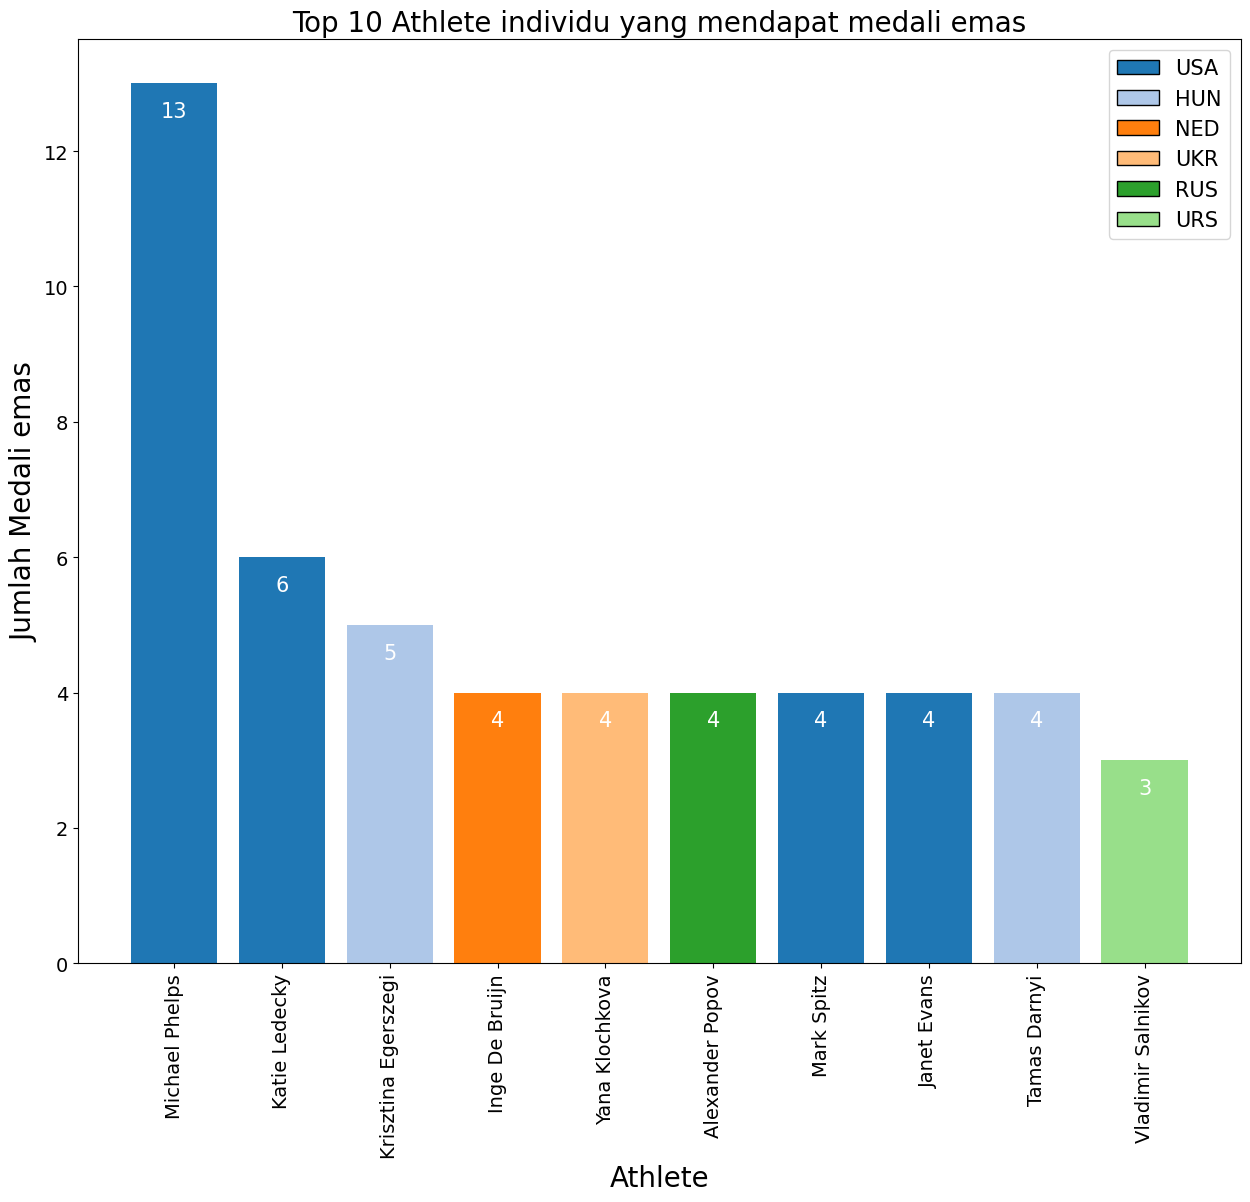

In [1028]:
gold_medals_pd = df[df['Rank'] == 1]
gold_medal_table = pd.pivot_table(gold_medals_pd, values=['Rank', 'Team'], index='Athlete', aggfunc={'Rank': 'sum', 'Team': 'first'})
gold_medal_df = gold_medal_table.reset_index()
gold_medal_df = gold_medal_df.sort_values('Rank', ascending=False)
gold_medal_df = gold_medal_df[:10].reset_index(drop=True)

#Create Bar Graph

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]

gold_medal_df = gold_medal_df.set_index('Athlete')
color_dict = {val: plt.cm.tab20(i) for i, val in enumerate(gold_medal_df['Team'].unique())}

fig, ax = plt.subplots()
ax.bar(gold_medal_df.index, gold_medal_df['Rank'], color=gold_medal_df['Team'].map(color_dict))
legend_elements = [Patch(facecolor=color_dict[val], edgecolor='black', label=val) for val in gold_medal_df['Team'].unique()]
ax.legend(handles=legend_elements, fontsize=15)

# Add text annotations to the bars
for i in range(len(gold_medal_df.index)):
    ax.text(gold_medal_df.index[i], gold_medal_df['Rank'][i] - .5, str(gold_medal_df['Rank'][i]), ha='center', fontsize=15, color='white')

ax.set_xlabel('Athlete', fontsize=20)
ax.set_ylabel('Jumlah Medali emas', fontsize=20)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.title("Top 10 Athlete individu yang mendapat medali emas", fontsize=20)

plt.show()

Dari bar diatas dapat kita lihat bahwa athlet yang mendapatkan medali paling banyak adalah michael phelps yang berasal dari USA. ia mendapatkan 13 medali emas. lalu athlet peringkat kedua yaitu Katie Ledecky mendapat 6 medali emas. dan di peringkat ketiga ada Krisztina Egerszegi dari Australia dengan perolehan 5 medali.

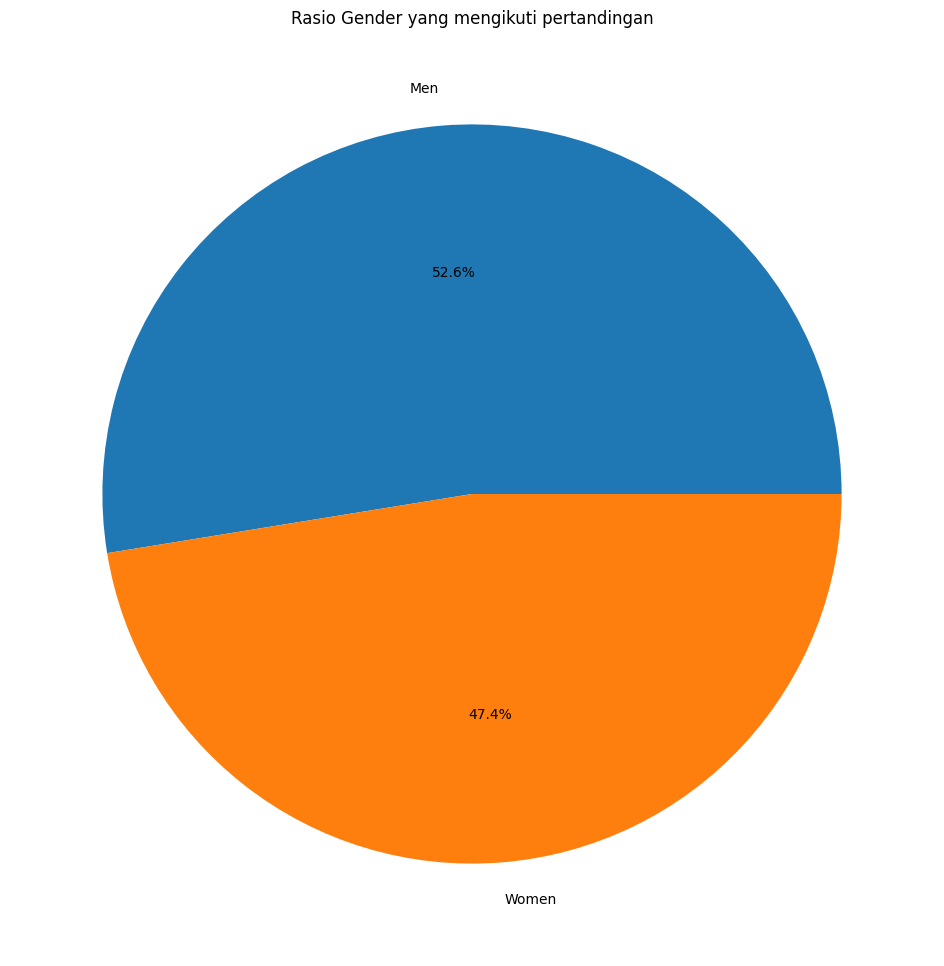

In [1029]:
plt.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Rasio Gender yang mengikuti pertandingan')
plt.show()

Dari diagram lingkaran diatas dapat kita tarik kesimpulan bahwa jumlah pria yang mengikuti perlombaan renang lebih banyak daripada wanita, dengan selisih 5,2% lebih banyak

#**Deskripsi Medali**
#0 - Did not Start/Finish or Disqualified
#1 - Gold
#2 - Silver
#3- Bronze
#4- No Medal
#5 - No Data

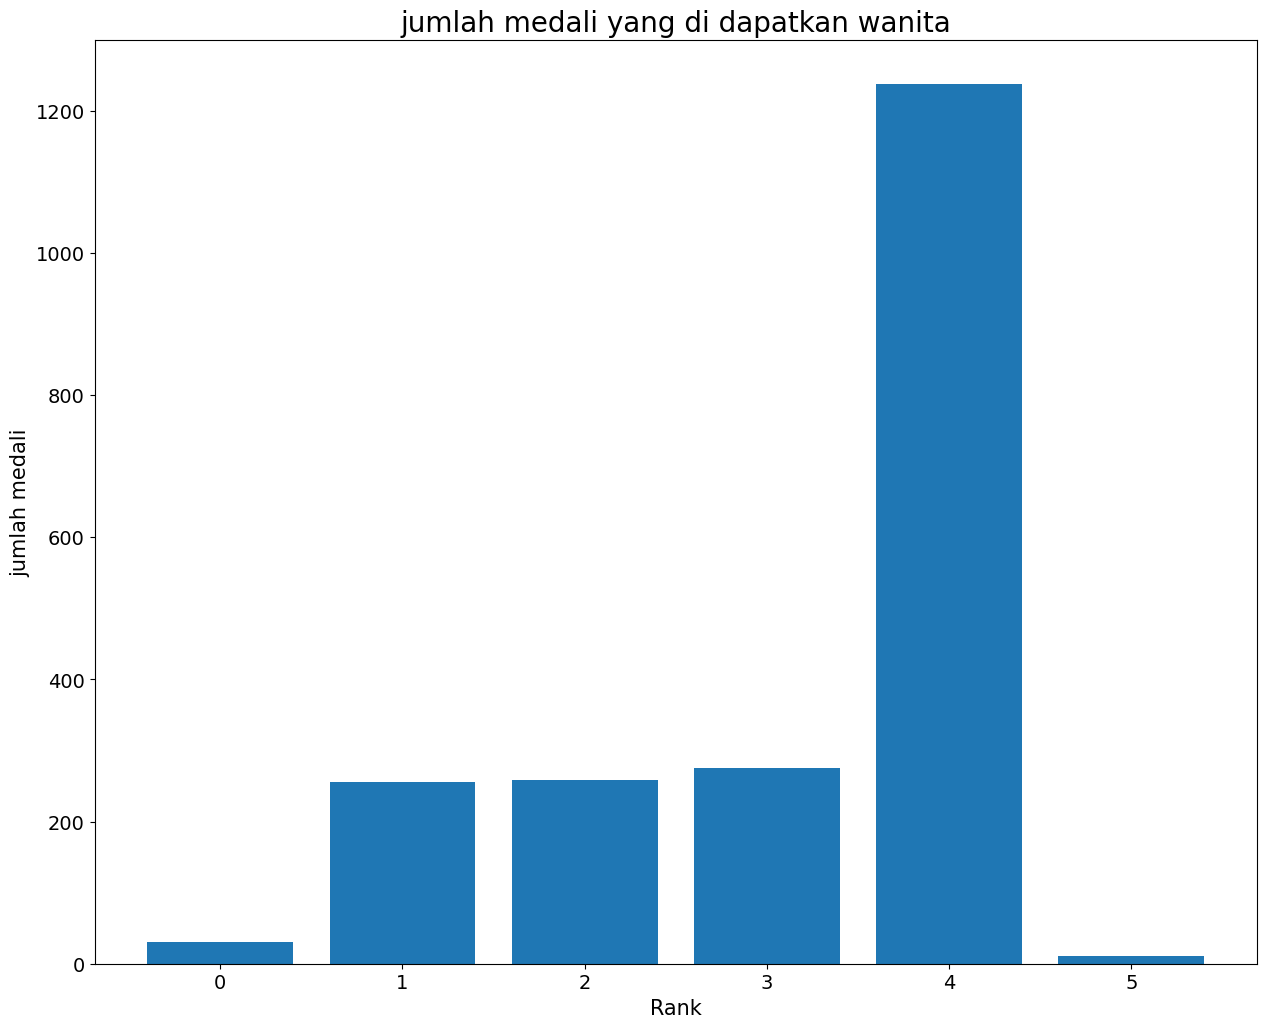

In [1030]:
women_df = df[df['Gender'] == 'Women']

# Hitung jumlah medali yang diperoleh oleh gender wanita
women_medals = women_df['Rank'].value_counts().sort_index()

# Create Graph
plt.bar(women_medals.index, women_medals.values)
plt.xlabel('Rank', fontsize=15)
plt.ylabel('jumlah medali', fontsize=15)
plt.title("jumlah medali yang di dapatkan wanita", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

dari diagram bar diatas dapat kita lihat bahwa wanita lebih banyak yang  tidak mendapatkan medali, lalu kedua terbanyak adalah medali perunggu dan disusul oleh medali perak dan emas. value paling rendah adalah nomor 5 yaitu No Data

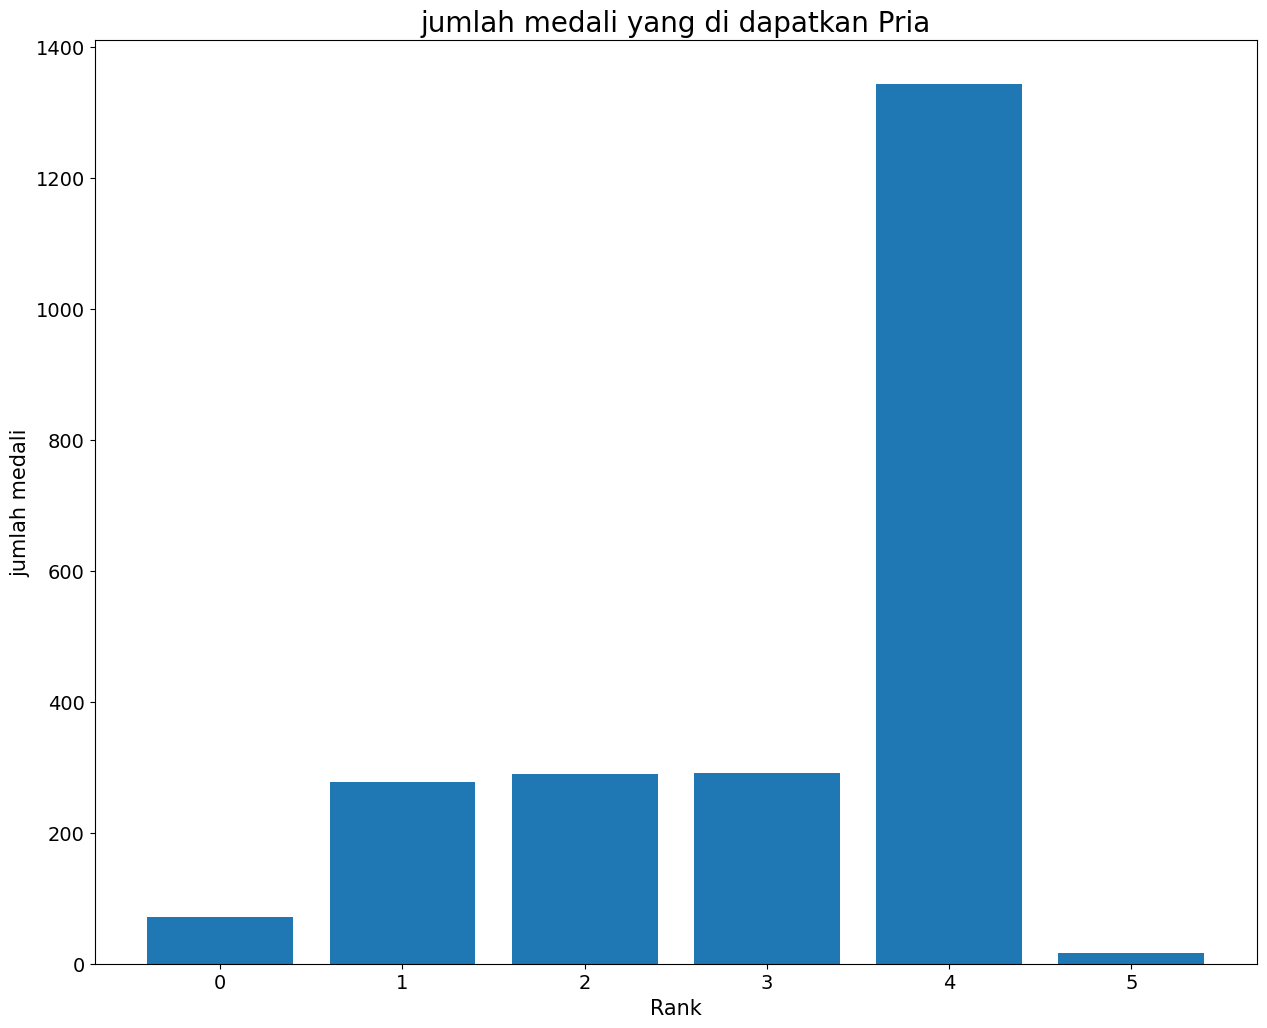

In [1031]:
women_df = df[df['Gender'] == 'Men']

# Hitung jumlah medali yang diperoleh oleh gender wanita
women_medals = women_df['Rank'].value_counts().sort_index()

# Create Graph
plt.bar(women_medals.index, women_medals.values)
plt.xlabel('Rank', fontsize=15)
plt.ylabel('jumlah medali', fontsize=15)
plt.title("jumlah medali yang di dapatkan Pria", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

dari diagram bar diatas dapat kita lihat bahwa Pria lebih banyak yang  tidak mendapatkan medali. dan value pria yang mendapatkan medali emas, perak dan perunggu hampir sama tetapi yang mendapat perunggu lebih banyak jumlahnya dibanding yang lain

#Verify Data Quality

#Missing Values

In [1032]:
df.isnull().sum()

Location                 0
Year                     0
Distance (in meters)     0
Stroke                   0
Relay?                   0
Gender                   0
Team                     0
Athlete                 14
Results                 28
Rank                     0
dtype: int64

Berdasarkan hasil penghitungan nilai yang hilang pada setiap kolom DataFrame dapat dismpulkan:

1. Terdapat 14 nilai yang hilang dalam kolom Athlete.
2. kolom Results memiliki 28 nilai yang hilang.
3. Tidak ada nilai yang hilang dalam kolom Location, Year, Distance (in meters), Stroke, Relay?, Gender, Team, dan Rank.

#Outliers Values

In [1033]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)

display(results_df)


,Persentase Outliers
Kolom,
Year,1.445286
Relay?,16.976371
Rank,0.000000


kesimpulan yang kita dapatkan adalah:

1. **Kolom 'Year'**: Persentase outliers pada kolom 'Year' adalah sekitar 1.45%. Ini menunjukkan bahwa sebagian kecil dari nilai dalam kolom 'Year' di luar jangkauan nilai yang dianggap normal atau mungkin tidak sesuai dengan pola umum data.

2. **Kolom 'Relay?'**: Persentase outliers pada kolom 'Relay?' adalah sekitar 16.98%. Ini menunjukkan bahwa sekitar 16.98% dari data dalam kolom 'Relay?' dianggap sebagai outliers. Hal ini mungkin menunjukkan adanya variasi yang signifikan dalam data terkait dengan apakah suatu perlombaan adalah estafet atau tidak.

3. **Kolom 'Rank'**: Tidak ada outliers yang terdeteksi dalam kolom 'Rank', karena persentase outliersnya adalah 0%. Ini mungkin menunjukkan bahwa data dalam kolom 'Rank' tidak memiliki nilai ekstrem yang jauh dari nilai-nilai lainnya atau pola yang tidak biasa.


#Duplicated Values

In [1034]:
df[df.duplicated()]

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
200,Tokyo,2020,400m,Freestyle,0,Women,AUS,Ariarne Titmus,3:56.69,1
201,Tokyo,2020,400m,Freestyle,0,Women,USA,Katie Ledecky,3:57.36,2
202,Tokyo,2020,400m,Freestyle,0,Women,CHN,Bingjie Li,4:01.08,3
203,Tokyo,2020,400m,Freestyle,0,Women,CAN,Summer Mcintosh,4:02.42,4
204,Tokyo,2020,400m,Freestyle,0,Women,CHN,Muhan Tang,4:04.10,4
205,Tokyo,2020,400m,Freestyle,0,Women,GER,Isabel Gose,4:04.98,4
206,Tokyo,2020,400m,Freestyle,0,Women,USA,Paige Madden,4:06.81,4
207,Tokyo,2020,400m,Freestyle,0,Women,NZL,Erika Fairweather,4:08.01,4
320,Rio,2016,200m,Breaststroke,0,Men,KAZ,Dmitriy Balandin,00:02:07.460000,1
321,Rio,2016,200m,Breaststroke,0,Men,USA,Josh Prenot,00:02:07.530000,2


berikut adalah kesimpulan :

1.Terdapat pola duplikasi dalam hasil kompetisi renang, dengan beberapa atlet menempati peringkat yang sama dalam perlombaan yang sama.

2.Duplikat terjadi baik pada acara jarak pendek maupun jarak panjang, serta dalam berbagai gaya renang, menunjukkan bahwa masalah ini melintasi variasi peristiwa.

3.Duplikat ditemukan di antara atlet pria dan wanita, serta di berbagai lokasi kompetisi.

4.Meskipun terdapat duplikat, hasil atlet dalam kelompok duplikat ini tetap konsisten, menunjukkan kecocokan dalam pencatatan hasil.


#Inconsistent Values / Noise (Optional)

In [1035]:
for column in df.columns:
    print(f"Column: {column}")
    unique_values_count = len(df[column].unique())
    print(f"Jumlah Nilai Unik: {unique_values_count}")
    print()

Column: Location
Jumlah Nilai Unik: 22

Column: Year
Jumlah Nilai Unik: 25

Column: Distance (in meters)
Jumlah Nilai Unik: 8

Column: Stroke
Jumlah Nilai Unik: 6

Column: Relay?
Jumlah Nilai Unik: 2

Column: Gender
Jumlah Nilai Unik: 2

Column: Team
Jumlah Nilai Unik: 87

Column: Athlete
Jumlah Nilai Unik: 2822

Column: Results
Jumlah Nilai Unik: 3636

Column: Rank
Jumlah Nilai Unik: 6



Berikut adalah kesimpulan berdasarkan output tersebut:

1. **Location**: Terdapat 22 lokasi yang berbeda di mana kompetisi renang diadakan.

2. **Year**: Kompetisi renang telah berlangsung selama 25 tahun yang berbeda.

3. **Distance (in meters)**: Terdapat 8 panjang jarak renang yang berbeda yang dipertandingkan.

4. **Stroke**: Ada 6 gaya renang yang berbeda yang dipertandingkan.

5. **Relay?**: Terdapat 2 nilai unik dalam kolom ini, mungkin menunjukkan apakah suatu perlombaan adalah estafet atau tidak.

6. **Gender**: Ada 2 jenis kelamin yang berbeda dari peserta dalam kompetisi renang.

7. **Team**: Terdapat 87 tim yang berbeda yang berpartisipasi dalam kompetisi renang.

8. **Athlete**: Sejumlah 2822 atlet yang berbeda berpartisipasi dalam kompetisi renang.

9. **Results**: Ada 3636 hasil yang berbeda yang dicapai oleh para peserta.

10. **Rank**: Terdapat 6 peringkat yang berbeda yang dapat dicapai oleh peserta dalam kompetisi renang.

#**Data Cleaning**

**1. Penanganan Missing Values**

**Pengecekkan Missing Values**

In [1036]:
print((df.isna().sum() / len(df)) * 100)

Location                0.000000
Year                    0.000000
Distance (in meters)    0.000000
Stroke                  0.000000
Relay?                  0.000000
Gender                  0.000000
Team                    0.000000
Athlete                 0.321175
Results                 0.642349
Rank                    0.000000
dtype: float64


Nilai Kosong Pada Kolom Athlete

In [1037]:
df[df['Athlete'].isnull()]

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
435,Rio,2016,4x100,Medley,1,Women,CHN,NaN,00:03:55.180000,4
436,Rio,2016,4x100,Medley,1,Women,CAN,NaN,00:03:55.490000,4
437,Rio,2016,4x100,Medley,1,Women,RUS,NaN,00:03:55.660000,4
438,Rio,2016,4x100,Medley,1,Women,GBR,NaN,00:03:56.960000,4
445,Rio,2016,4x200,Freestyle,1,Men,GER,NaN,00:07:07.280000,4
952,Beijing,2008,4x200,Freestyle,1,Men,USA,NaN,00:06:58.560000,1
1432,Sydney,2000,4x100,Freestyle,1,Men,AUS,NaN,00:03:13.670000,2
1467,Sydney,2000,4x200,Freestyle,1,Men,ITA,NaN,00:07:12.910000,4
1688,Atlanta,1996,4x100,Freestyle,1,Men,USA,NaN,00:03:15.410000,1
2227,Seoul,1988,4x200,Freestyle,1,Men,AUS,NaN,00:07:15.230000,4


Nilai Kosong Pada Kolom Result

In [1038]:
df[df['Results'].isnull()]

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
271,Rio,2016,100m,Butterfly,0,Women,USA,Kelsi Worrell,NaN,5
431,Rio,2016,4x100,Medley,1,Men,IR,"Bence Pulai, Richard Bohus, Daniel Gyurta, Gab...",NaN,5
679,London,2012,4x100,Freestyle,1,Women,SWE,"Michelle Coleman, Gabriella Fagundez, Sarah Sj...",NaN,5
943,Beijing,2008,4x100,Medley,1,Men,FRA,"Benjamin Stasiulis, Christophe Lebon, Fabien G...",NaN,5
951,Beijing,2008,4x100,Medley,1,Women,GER,"Antje Buschschulte, Daniela Samulski, Britta S...",NaN,5
1023,Athens,2004,100m,Breaststroke,0,Women,CHN,Hui Qi,NaN,5
1087,Athens,2004,200m,Breaststroke,0,Men,AUS,Jim Piper,NaN,5
1207,Athens,2004,4x100,Medley,1,Women,GBR,"Kathryn Evans, Kirsty Balfour, Georgina Lee, S...",NaN,5
1439,Sydney,2000,4x100,Freestyle,1,Men,RUS,"Andrey Kapralov, Alexander Popov, Denis Pimankov",NaN,5
1703,Atlanta,1996,4x100,Freestyle,1,Women,RUS,"Natalya Sorokina, Yelena Nazemnova, Natalia Me...",NaN,5


#**Hapus Missing Values**

Karena tidak ada nilai kosong yang di atas 70% maka tidak ada kolom yang di hapus

#**Imputasi Missing Values**

In [1039]:
df['Results'].dropna().describe()

count              4331
unique             3635
top       Did not start
freq                 43
Name: Results, dtype: object

Untuk kolom Result, karna dia bertipe data object, maka kita dapat menggunakan Uniqe dari kolom Results untuk imputasi nilai kosong tersebut

In [1040]:
df['Results'] = df['Results'].fillna(df['Results'].dropna().unique ()[0])


In [1041]:
df['Athlete'].dropna().describe()

count               4345
unique              2821
top       Michael Phelps
freq                  18
Name: Athlete, dtype: object

Kolom Athlete sama seperti kolom Result yang bertipe data object, maka kita dapat menggunakan Uniqe dari kolom Results untuk imputasi nilai kosong tersebut

In [1042]:
df['Athlete'] = df['Athlete'].fillna(df['Athlete'].dropna().unique()[0])

#**Pengecekan Ulang**

Berikut adalah hasil setelah imputasi

In [1043]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Location,0.0
Year,0.0
Distance (in meters),0.0
Stroke,0.0
Relay?,0.0
Gender,0.0
Team,0.0
Athlete,0.0
Results,0.0
Rank,0.0


#**2. Penanganan Duplicated Values**

Pengecekkan Nilai Duplikat

In [1044]:
df[df.duplicated()]

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
200,Tokyo,2020,400m,Freestyle,0,Women,AUS,Ariarne Titmus,3:56.69,1
201,Tokyo,2020,400m,Freestyle,0,Women,USA,Katie Ledecky,3:57.36,2
202,Tokyo,2020,400m,Freestyle,0,Women,CHN,Bingjie Li,4:01.08,3
203,Tokyo,2020,400m,Freestyle,0,Women,CAN,Summer Mcintosh,4:02.42,4
204,Tokyo,2020,400m,Freestyle,0,Women,CHN,Muhan Tang,4:04.10,4
205,Tokyo,2020,400m,Freestyle,0,Women,GER,Isabel Gose,4:04.98,4
206,Tokyo,2020,400m,Freestyle,0,Women,USA,Paige Madden,4:06.81,4
207,Tokyo,2020,400m,Freestyle,0,Women,NZL,Erika Fairweather,4:08.01,4
320,Rio,2016,200m,Breaststroke,0,Men,KAZ,Dmitriy Balandin,00:02:07.460000,1
321,Rio,2016,200m,Breaststroke,0,Men,USA,Josh Prenot,00:02:07.530000,2


In [1045]:
df = df.drop_duplicates()

#**Pengecekan Ulang**

In [1046]:
df[df.duplicated()]

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank


Dapat kita lihat bahwa Nilai duplikat pada dataset ini telah dihapus

#**3. Penanganan Outliers**

Pengecekkan Outliers

In [1047]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Year,1.452617
Relay?,17.062486
Rank,0.000000


Dapat kita lihat pada tabel Persentase Outliers diatas, terdapat 2 kolom yang mempunyai outliers. kolom Year dengan 1,45%, Relay? 17%.

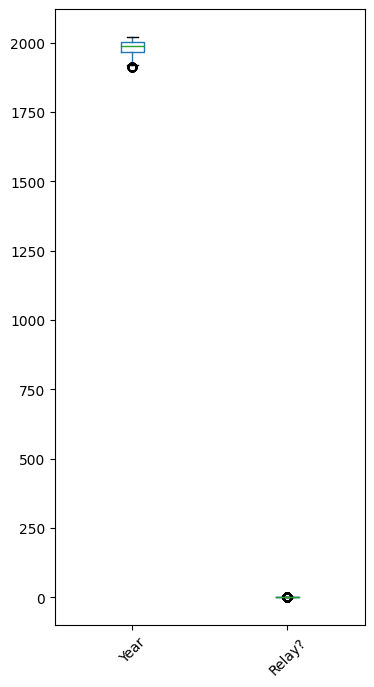

In [1048]:
boxplot = df.drop('Rank', axis=1).boxplot(grid=False, rot=45,  figsize=(4,8))

Grafik diatas adalah boxplot dari outliers tersebut

#**Hapus Outliers**

Lalu kita melakukan penghapusan baris pada kolom "Relay?" untuk menanganani outliers. sedangkan untuk kolom Year tidak perlu karna outliersnya hanya berjumlah 1,5

In [1049]:
Q1 = df['Relay?'].quantile(0.25)
Q3 = df['Relay?'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Relay?'] >= lower_bound) & (df['Relay?'] <= upper_bound)]

#**Pengecekan Ulang**

In [1050]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Year,1.529052
Relay?,0.000000
Rank,0.000000


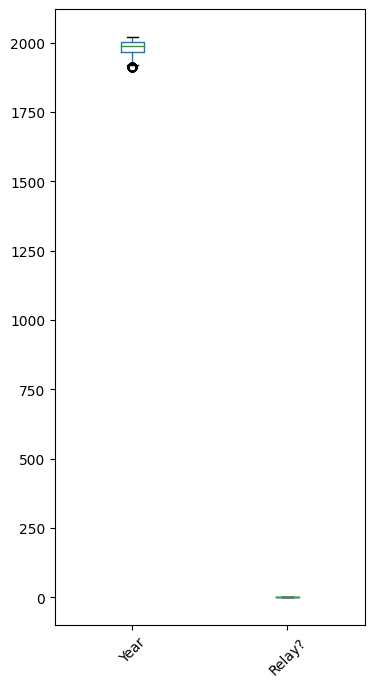

In [1051]:
boxplot = df.drop('Rank', axis=1).boxplot(grid=False, rot=45,  figsize=(4,8))

#**Construct Data**

**Melakukan Rekayasa Fitur (Feature Engineering)**

Saya melakukan Construct data di bagian Distance atau jarak tempuh renang. Pertama tama saya mengubah nama kolom terlebih dahulu agar lebih mudah menjalankan syntaxnya

In [1052]:
df = df.rename(columns={'Distance (in meters)': 'Distance'})

setelah itu saya mengkategorikan jarak renang berdasarkan panjang lintasan yang di lalui. Dengan mengkategorikan jarak, Anda dapat mengelompokkan entitas atau lokasi ke dalam kategori yang memiliki makna atau signifikansi tertentu.

In [1053]:
df['Distance'] = df['Distance'].apply(lambda x: ''.join(filter(str.isdigit, x)))

def DistanceCategory(Distance):
    if Distance < 500:
        return 'near'
    elif 500 <= Distance < 1000:
        return 'middle'
    elif 1000 <= Distance < 1500:
        return 'long'
    else:
        return 'Estafet'

# Pastikan nilai di kolom 'Distance' dapat dikonversi menjadi tipe data numerik
df['Distance'] = df['Distance'].astype(int)

# Gunakan fungsi DistanceCategory untuk membuat kolom baru 'DistancesCategory'
df['DistancesCategory'] = df['Distance'].apply(DistanceCategory)


#**Pengecekan Hasil**

Hasilnya seperti dibawah ini

In [1054]:
df

,Location,Year,Distance,Stroke,Relay?,Gender,Team,Athlete,Results,Rank,DistancesCategory
0,Tokyo,2020,100,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1,near
1,Tokyo,2020,100,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2,near
2,Tokyo,2020,100,Backstroke,0,Men,USA,Ryan Murphy,52.19,3,near
3,Tokyo,2020,100,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4,near
4,Tokyo,2020,100,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4,near
...,...,...,...,...,...,...,...,...,...,...,...
4346,Stockholm,1912,400,Freestyle,0,Men,ANZ,Cecil Healy,00:05:37.800000,4,near
4347,Stockholm,1912,400,Freestyle,0,Men,HUN,Béla Las Torres,00:05:42.000000,4,near
4348,Stockholm,1912,400,Freestyle,0,Men,ITA,Mario Massa,Did not finish,0,near
4349,Stockholm,1912,400,Freestyle,0,Men,RUS,Pavel Avksentyev,Did not finish,0,near


#**Data Reduction**

#**Mengurangi Fitur - Fitur Yang Kurang Relevan**

Untuk mengurangi fitur yang relevan,  pertama - tama saya menghapus nilai 0 dan 5 pada kolom Rank. karena kolom rank yang bernilai 5 adalah data yang tidak lengkap, dan nilai 0 adalah data yang di diskualifikasi

In [1055]:
rows_to_drop = []
for index, row in df.iterrows():
    if row['Rank'] == 0 or row['Rank'] == 5:
        rows_to_drop.append(index)

# Jatuhkan baris yang sesuai
df = df.drop(rows_to_drop, axis=0)


Lalu saya mengubah format dari kolom Result menjadi format jam : menit : detik. saya melakukan itu agar data lebih rapih dan dapat saya ubah ke detik agar nolom Result tidak bias

In [1056]:
df = df.reset_index(drop=True)
for i in range(len(df)):
    item = df.iloc[i, 8].split('.')[0]
    if item.count(':') == 0:
        df.iloc[i, 8] = '00:00:' + item
    elif item.count(':') == 1:
        df.iloc[i, 8] = '00:' + item
    elif item.count(':') == 2:
        df.iloc[i, 8] = item



Setelah mengubah format dari kolom Result, saya mengubahnya menjadi kolom result yang berisi detik dari hasil pertandingan.

In [1057]:
def time_to_seconds(time_str):
    try:
        hours, minutes, seconds = map(int, time_str.split(':'))
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    except ValueError:
        return None

# Mengonversi kolom 'Results' menjadi detik
df['Result'] = df['Results'].apply(time_to_seconds)

# Menghapus kolom 'Results'
df.drop(columns=['Results'], inplace=True)

Hasilnya menjadi seperti ini

In [1058]:
df

,Location,Year,Distance,Stroke,Relay?,Gender,Team,Athlete,Rank,DistancesCategory,Result
0,Tokyo,2020,100,Backstroke,0,Men,ROC,Evgeny Rylov,1,near,51
1,Tokyo,2020,100,Backstroke,0,Men,ROC,Kliment Kolesnikov,2,near,52
2,Tokyo,2020,100,Backstroke,0,Men,USA,Ryan Murphy,3,near,52
3,Tokyo,2020,100,Backstroke,0,Men,ITA,Thomas Ceccon,4,near,52
4,Tokyo,2020,100,Backstroke,0,Men,CHN,Jiayu Xu,4,near,52
...,...,...,...,...,...,...,...,...,...,...,...
3487,Stockholm,1912,400,Freestyle,0,Men,CAN,George Ritchie Hodgson,1,near,324
3488,Stockholm,1912,400,Freestyle,0,Men,GBR,John Gatenby Hatfield,2,near,325
3489,Stockholm,1912,400,Freestyle,0,Men,ANZ,Harold H. Hardwick,3,near,331
3490,Stockholm,1912,400,Freestyle,0,Men,ANZ,Cecil Healy,4,near,337


Lalu saya juga menghapus kolom kolom yang dimana kurang relevan dengan analisis saya

In [1059]:
df = df.drop(['Location', 'Team', 'Relay?','Athlete'], axis=1)

#**Pengecekan Hasil**

Lalu hasil dari data reduction saya menjadi seperti ini

In [1060]:
df

,Year,Distance,Stroke,Gender,Rank,DistancesCategory,Result
0,2020,100,Backstroke,Men,1,near,51
1,2020,100,Backstroke,Men,2,near,52
2,2020,100,Backstroke,Men,3,near,52
3,2020,100,Backstroke,Men,4,near,52
4,2020,100,Backstroke,Men,4,near,52
...,...,...,...,...,...,...,...
3487,1912,400,Freestyle,Men,1,near,324
3488,1912,400,Freestyle,Men,2,near,325
3489,1912,400,Freestyle,Men,3,near,331
3490,1912,400,Freestyle,Men,4,near,337


In [1061]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

#**Data Transformation**

**Mapping**

Selanjutnya adalah mapping. Mapping gender digunakan untuk mengonversi informasi tentang jenis kelamin seseorang menjadi representasi numerik. Ini bisa dilakukan untuk berbagai analisis dan pemrosesan data. disini saya mapping di bagian gender dan distances catergory karna unique value nya sedikit

In [1062]:
df['Gender'] = df['Gender'].map({'Men':1,'Women':0})
df['DistancesCategory'] = df['DistancesCategory'].map({'near': 0, 'middle': 1,'long': 2, 'Estafet':3}).astype(int)

In [1063]:
df

,Year,Distance,Stroke,Gender,Rank,DistancesCategory,Result
0,2020,100,Backstroke,1,1,0,51
1,2020,100,Backstroke,1,2,0,52
2,2020,100,Backstroke,1,3,0,52
3,2020,100,Backstroke,1,4,0,52
4,2020,100,Backstroke,1,4,0,52
...,...,...,...,...,...,...,...
3487,1912,400,Freestyle,1,1,0,324
3488,1912,400,Freestyle,1,2,0,325
3489,1912,400,Freestyle,1,3,0,331
3490,1912,400,Freestyle,1,4,0,337


#**Encoding**

In [1064]:
df = pd.get_dummies(df)

lalu Encoding dilakukan untuk mengubah data dari satu bentuk ke bentuk lain agar  dapat digunakan untuk analisis atau pemrosesan lebih lanjut

In [1065]:
df

,Year,Distance,Gender,Rank,DistancesCategory,Result,Stroke_Backstroke,Stroke_Breaststroke,Stroke_Butterfly,Stroke_Freestyle,Stroke_Individual medley
0,2020,100,1,1,0,51,1,0,0,0,0
1,2020,100,1,2,0,52,1,0,0,0,0
2,2020,100,1,3,0,52,1,0,0,0,0
3,2020,100,1,4,0,52,1,0,0,0,0
4,2020,100,1,4,0,52,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3487,1912,400,1,1,0,324,0,0,0,1,0
3488,1912,400,1,2,0,325,0,0,0,1,0
3489,1912,400,1,3,0,331,0,0,0,1,0
3490,1912,400,1,4,0,337,0,0,0,1,0


In [1066]:
df.to_csv("/content/Olympic_Swimming_Results_1912to2020.csv")